**LetsGrowMore Virtual Internship Program**

Data Science Internship - LGMVIP JULY 2022


---


**By: Arunjyoti Mukherjee**

Linkedin: https://www.linkedin.com/in/arunjyoti-mukherjee-903823178/

GitHub: https://github.com/programaccount

---


**Advanced Level Task2:**

**Next Word Prediction.**

**Dataset:** https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

**Importing necessary required libraries and loading the dataset**

In [ ]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
text = open('gdrive/My Drive/Colab Notebooks/Lets Grow More Internship Tasks/Dataset Task Files/1661-0.txt',encoding='UTF-8').read().lower()
print('corpus length:\t', len(text))

corpus length:	 581888


**Splitting the dataset into each word in order but without the presence of some special characters**

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
words

['project',
 'gutenberg',
 's',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'ano

**Feature Engineering in our data:**

For this purpose, we will require a dictionary with each word in the data within the list of unique words as the key, and it’s significant portions as value.


In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

**Feature Engineering:**

In [ ]:
word_len = 5
prev_words = []
next_words = []
for i in range(len(words) - word_len):
    prev_words.append(words[i:i + word_len])
    next_words.append(words[i + word_len])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


**We will create two numpy arrays x for storing the features and y for storing its corresponding label. We will iterate x and y if the word is available so that the corresponding position becomes 1.**

In [ ]:
X = np.zeros((len(prev_words), word_len, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

**A look at a single sequence of words**

In [ ]:
print(X[0][0])

[False False False ... False False False]


**Building the Recurrent Neural network**

In [ ]:
#Building the LSTM model,which is a very powerful RNN
model = Sequential()
model.add(LSTM(128, input_shape=(word_len, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

**Training the Next Word Prediction Model**

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


811/811 [==============================] - 251s 306ms/step - loss: 6.0158 - accuracy: 0.1056 - val_loss: 7.0229 - val_accuracy: 0.1042
Epoch 2/2
811/811 [==============================] - 246s 304ms/step - loss: 5.7783 - accuracy: 0.1467 - val_loss: 7.9259 - val_accuracy: 0.0992


**Saving the model for future** 

In [ ]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

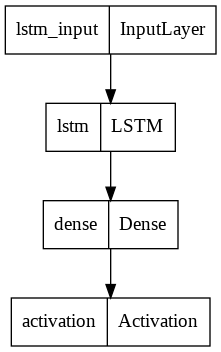

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

**Evaluating the Next Word Prediction Model**

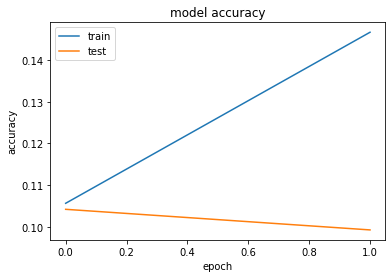

In [ ]:
#Model accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model loss**

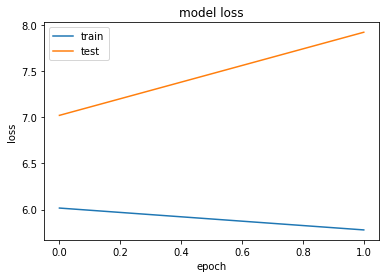

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Testing the Next Word Prediction Model**

In [ ]:
def prepare_input(text):
    x = np.zeros((1, word_len, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

In [ ]:
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
def prepare_input(text):
    x = np.zeros((1, word_len, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

**To choose the best possible n words**

In [ ]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
                
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

**Function for prediction**

In [ ]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [ ]:
q =  "Light the candle instead of cursuing darkness"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  Light the candle instead of cursuing darkness
Sequence:  light the candle instead of
light
the
candle
instead
of
next possible words:  ['the', 'a', 'his', 'my', 'it']
